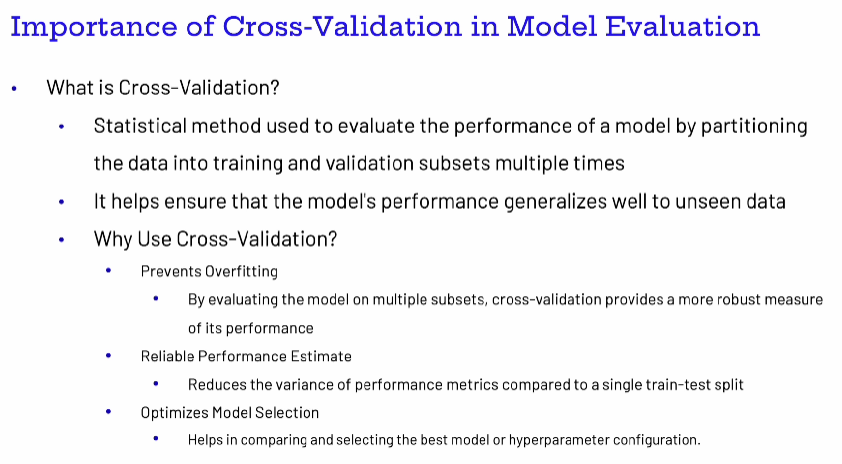
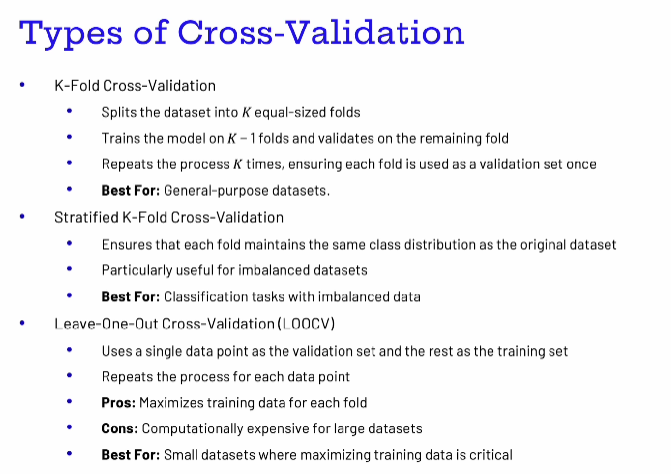
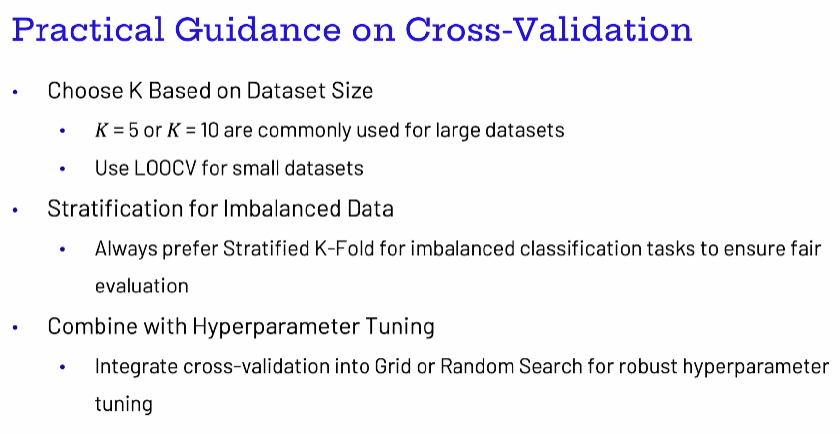

In [13]:
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


In [ ]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
x = df.drop(columns=['Class'])
y = df['Class']
x_train, x_test, y_train , y_test = train_test_split(x,y, random_state=42, test_size=0.2)


In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(random_state=42)
scores_kf = cross_val_score(rf, x_train, y_train, cv=kf, scoring='accuracy')

In [12]:
print(f"K-Fold cross validation scores: {scores_kf}")
print(f"Mean accuracy (K-Fold): {scores_kf.mean():.2f}")

K-Fold cross validation scores: [0.99962694 0.99938555 0.99949527 0.99951722 0.99945138]
Mean accuracy (K-Fold): 1.00


In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score_skf = cross_val_score(rf, x_train, y_train, cv=skf, scoring='accuracy')

In [15]:
print(f"Stratified k-fold cross validation scores: {score_skf}")
print(f"Mean Accuracy (k-fold): {score_skf.mean():.2f}")

Stratified k-fold cross validation scores: [0.99967083 0.99942944 0.99953916 0.99958305 0.9993636 ]
Mean Accuracy (k-fold): 1.00
